### The first step of building a text classifier is to gather data
For demostration purpose I used the bbc text data freely available online at https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O bbc-text.csv

--2020-07-03 10:21:25--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.11.48, 172.217.12.208, 172.217.3.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.11.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘bbc-text.csv’

bbc-text.csv        100%[===================>]   4.82M  8.25MB/s    in 0.6s    

2020-07-03 10:21:26 (8.25 MB/s) - ‘bbc-text.csv’ saved [5057493/5057493]



### Exploring the data
Load the data into pandas

In [2]:
import pandas as pd
df = pd.read_csv('bbc-text.csv')

In [3]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

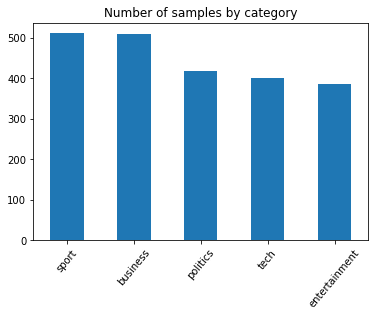

In [5]:
df['category'].value_counts().plot.bar(rot=50, title='Number of samples by category');

We can see the data set size is in good balance that each category has similar number of rows. This is really good for training a model. In reality we may find the a great number of sample data belong to just a few top categories, in that case we might want to reblance the training data set.

#### Now check the statistics of the number of words in each sample data

In [6]:
df['text'].str.split().apply(len).describe()

count    2225.000000
mean      390.295281
std       241.753128
min        90.000000
25%       250.000000
50%       337.000000
75%       479.000000
max      4492.000000
Name: text, dtype: float64

In [7]:
print("samples/words-per-sample ratio is:", round(2225 / 390))

samples/words-per-sample ratio is: 6


So within the total 18768 number of records, there are average **390** words in each text, and the minimum number of words in text is **90** and maximum number of words in text is **4492**, and the medium number of words is **337**

#### Now take a look at the text that have the least number of words and most number of words

In [8]:
# the text that have the least number of words
df[df['text'].str.split().apply(len) == 90]['text'].values[0]

'blunkett hints at election call ex-home secretary david blunkett has given fresh clues that the general election will be announced on monday.  he told bbc radio five live:  i m out in my constituency getting ready for what we presume will be an announcement very shortly at the weekend.  he clarified that he meant he would be in his sheffield seat this weekend  not that he expected an election call then. tony blair is tipped to ask the queen on monday to dissolve parliament ready for a 5 may poll.'

In [9]:
# the text that have the most number of words, show only the first 1000 characters 
df[df['text'].str.split().apply(len) == 4492]['text'].values[0][:1000]

'terror powers expose  tyranny  the lord chancellor has defended government plans to introduce control orders to keep foreign and british terrorist suspects under house arrest  where there isn t enough evidence to put them on trial.  lord falconer insists that the proposals do not equate to a police state and strike a balance between protecting the public against the threat of terrorism and upholding civil liberties. but thriller writer frederick forsyth tells bbc news of his personal response to the move.    there is a mortal danger aimed at the heart of britain. or so says home secretary charles clarke. my reaction  so what  it is not that i am cynical or just do not care. i care about this country very much.  but in the 66 years that i have been alive  there has not been one hour  of one day  of one month  of one year  when there has not been a threat aimed at us. my point is  the british have always coped without becoming a dictatorship. we have coped with fear without becoming a s

We can see the data are pretty clean already, if not so we would run clean up process like removing new line and tab characters or removing special characters, or replacing numbers with a token...
``` df['text'] = df['text'].str.replace('\n', ' ').replace('\t', ' ')```

In this case we will leave the data as is